In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from os.path import exists as file_exists


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)


drive.mount('/content/gdrive')

#leitura do arquivo
!ls "/content/gdrive/MyDrive/Colab Notebooks/"

file = '/content/gdrive/MyDrive/Colab Notebooks/ia/bank.csv'



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 CdiasExercicio2.ipynb
'Cópia de Charts in Colaboratory'
'Cópia de deep_neural_decision_forests'
'Cópia de PY0101EN-4-1-ReadFile.ipynb'
 estatistica
 estats
 Exercicio2-parte2.ipynb
 Exercicios-2.ipynb
 files
 ia
 IA-LAB1
 IA-LAB1-OutLiers.ipynb
 IA_Lab2.ipynb
 IA-Lab2.ipynb
 ImagemCloud.ipynb
 Lista1-IA.ipynb
 lista1.ipynb
 lista2.ipynb
 Lista3-2.ipynb
 lista3.ipynb
 Lista5.ipynb
 medidas_estatisticas.ipynb
 p3-random-forest-tuning-randomizedsearchcv.ipynb
 palavras.txt
 parrot.ipynb
'Política e COVID.ipynb'
'Política e COVID_NOVO.ipynb'
 ProjetoEstat.ipynb
 ProjetoFinalTAAED-v1.ipynb
 RandomForest.ipynb
 random-forests-and-keras.ipynb
 SE_RF+KNN.ipynb
 step-by-step-kmeans-explained-in-detail.ipynb
 -SupervisedLearning.ipynb
 SupervisedLearning.ipynb
 tempoxclasse.ipynb
'Trabalho de I.A.gdoc'
 TrabalhoFinal.ipynb
 TrabalhoFinal_SE2.ipynb
 TrabalhoFina

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/gdrive/MyDrive/Colab Notebooks/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

CdiasExercicio2.ipynb
Cópia de Charts in Colaboratory
Cópia de deep_neural_decision_forests
Cópia de PY0101EN-4-1-ReadFile.ipynb
estatistica
estats
Exercicio2-parte2.ipynb
Exercicios-2.ipynb
files
ia
IA-LAB1
IA-LAB1-OutLiers.ipynb
IA_Lab2.ipynb
IA-Lab2.ipynb
ImagemCloud.ipynb
Lista1-IA.ipynb
lista1.ipynb
lista2.ipynb
Lista3-2.ipynb
lista3.ipynb
Lista5.ipynb
medidas_estatisticas.ipynb
p3-random-forest-tuning-randomizedsearchcv.ipynb
palavras.txt
parrot.ipynb
Política e COVID.ipynb
Política e COVID_NOVO.ipynb
ProjetoEstat.ipynb
ProjetoFinalTAAED-v1.ipynb
RandomForest.ipynb
random-forests-and-keras.ipynb
SE_RF+KNN.ipynb
step-by-step-kmeans-explained-in-detail.ipynb
-SupervisedLearning.ipynb
SupervisedLearning.ipynb
tempoxclasse.ipynb
Trabalho de I.A.gdoc
TrabalhoFinal.ipynb
TrabalhoFinal_SE2.ipynb
TrabalhoFinal_SE.ipynb
trabalhoIA.ipynb
Untitled
Untitled0.ipynb
Untitled (1)



In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

# Método avaliação do modelo de Bank Data Marketing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(Y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(Y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(Y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(Y_test, dt_classifier.predict(X_test)))
    plt.figure(figsize = (5,4))
    cm = confusion_matrix(Y_train, dt_classifier.predict(X_train))
    sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

# Data preparation

### Input missing lines, Convert to binaries, Normalization, Scale

In [ ]:
def process(df):
    # Imput missing lines and drop line with problem
    from sklearn.impute import SimpleImputer

    df['pdays'] = SimpleImputer(strategy='median').fit_transform(
                                    df['pdays'].values.reshape(-1, 1))
    df = df.dropna()
    for col in ['previous']:
        df[col] = SimpleImputer(missing_values=-1).fit_transform(
                                    df[col].values.reshape(-1, 1))
    # Convert to binaries
    for col in ['housing', 'y']:
        df[col] = (df[col] == 'yes').astype(int)
        #df[col] = (df[col] == 'no').astype(int)
    
    # Normalization    
    from sklearn.preprocessing import normalize
    qty_related = ['balance', 'duration']
    df[qty_related] = normalize(df[qty_related], axis=1)
    
    # Scale pdays
    df.pdays = df.pdays/df.pdays.max() #.astype(np.float64)
    return df

cols=range(1,17)



df = process(pd.read_csv(file, usecols=cols, delimiter=';'))
df.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unemployed,married,primary,no,0.999024,0,no,cellular,19,oct,0.044165,1,-0.001148,0.0,unknown,0
1,services,married,secondary,no,0.998946,1,yes,cellular,11,may,0.045890,1,0.389208,4.0,failure,0
2,management,single,tertiary,no,0.990741,1,no,cellular,16,apr,0.135768,1,0.378875,1.0,failure,0
3,management,married,tertiary,no,0.991033,1,yes,unknown,3,jun,0.133615,4,-0.001148,0.0,unknown,0
4,blue-collar,married,secondary,no,0.000000,1,no,unknown,5,may,1.000000,1,-0.001148,0.0,unknown,0


In [ ]:
df = df.replace(to_replace=r'single', value=1, regex=True)
df = df.replace(to_replace='married', value=2, regex=False)
df = df.replace(to_replace=r'divorced', value=3, regex=True)

df = df.replace(to_replace=r'unknown', value=0, regex=True)
df = df.replace(to_replace=r'failure', value=1, regex=True)
df = df.replace(to_replace=r'success', value=2, regex=True)
df = df.replace(to_replace=r'other', value=3, regex=False)

df = df.replace(to_replace=r'primary', value=1, regex=True)
df = df.replace(to_replace='secondary', value=2, regex=False)
df = df.replace(to_replace=r'tertiary', value=3, regex=True)

df = df.replace(to_replace=r'cellular', value=1, regex=True)
df = df.replace(to_replace=r'telephone', value=2, regex=True)

df = df.replace(to_replace=r'no', value=0, regex=True)
df = df.replace(to_replace=r'yes', value=1, regex=True)

df = df.replace(to_replace=r'jan', value=1, regex=False)
df = df.replace(to_replace=r'feb', value=2, regex=False)
df = df.replace(to_replace=r'mar', value=3, regex=False)
df = df.replace(to_replace=r'apr', value=4, regex=False)
df = df.replace(to_replace=r'may', value=5, regex=False)
df = df.replace(to_replace=r'jun', value=6, regex=False)
df = df.replace(to_replace=r'jul', value=7, regex=False)
df = df.replace(to_replace=r'aug', value=8, regex=False)
df = df.replace(to_replace=r'sep', value=9, regex=False)
df = df.replace(to_replace=r'oct', value=10, regex=False)
df = df.replace(to_replace=r'nov', value=11, regex=False)
df = df.replace(to_replace=r'dec', value=12, regex=False)



df = df.replace(to_replace=r'student', value=1, regex=False)
df = df.replace(to_replace=r'unemployed', value=2, regex=False)
df = df.replace(to_replace=r'entrepreneur', value=3, regex=False)
df = df.replace(to_replace=r'housemaid', value=4, regex=False)
df = df.replace(to_replace=r'self-employed', value=5, regex=False)
df = df.replace(to_replace=r'retired', value=5, regex=False)
df = df.replace(to_replace=r'services', value=6, regex=False)
df = df.replace(to_replace=r'technician', value=7, regex=False)
df = df.replace(to_replace=r'blue-collar', value=8, regex=False)
df = df.replace(to_replace=r'management', value=9, regex=False)
df = df.replace(to_replace=r'admin.', value=10, regex=False)

df.dtypes



job            int64
marital        int64
education      int64
default        int64
balance      float64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration     float64
campaign       int64
pdays        float64
previous     float64
poutcome       int64
y              int64
dtype: object

# Razão de variância

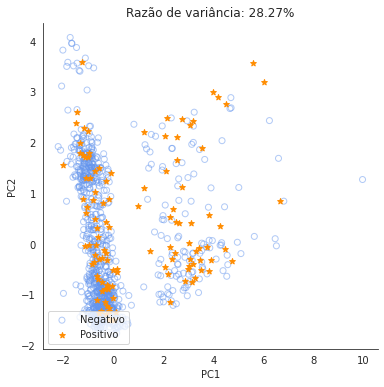

In [ ]:
def plot_2d(X, y, title=''):
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)

    from sklearn.decomposition import PCA
    dec = PCA(n_components=2)
    X_reduced = dec.fit_transform(X_std)
    
    f, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_reduced[y==0,0], X_reduced[y==0,1], alpha=0.5, 
               facecolors='none', edgecolors='cornflowerblue', label="Negativo")
    ax.scatter(X_reduced[y==1,0], X_reduced[y==1,1], c='darkorange', marker='*', 
               label='Positivo')
    plt.title("Razão de variância: %.2f%%" % (100*dec.explained_variance_ratio_.sum()))
    ax.legend(loc='lower left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    plt.show()
    
sample = df.sample(1000, random_state=36)

X_sample = sample.drop('y',axis=1).values
#X_sample = sample[[ 'balance', 'day' ]].values
y_sample = sample['y'].values

plot_2d(X_sample, y_sample)

# Treinamento

In [ ]:
X = df.drop('y', axis=1)
y = np.ravel(df.iloc[: , -1:])
print('Imbalanced ratio in training set: 1:%i' % (Counter(y)[0]/Counter(y)[1]))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# Divisão do conjunto de dados  teste (1/3); treino (2/3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


X.corr()



Imbalanced ratio in training set: 1:7


,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
job,1.000000,0.004932,0.161522,-0.020684,0.000280,0.151590,0.024478,-0.037959,0.016521,0.004057,-0.026705,0.022216,0.035342,0.005140,0.015903
marital,0.004932,1.000000,-0.109124,0.020745,-0.036704,0.029851,0.045210,-0.037977,-0.008794,0.004535,0.024096,-0.005915,-0.017050,-0.038028,-0.031079
education,0.161522,-0.109124,1.000000,-0.008835,0.028070,-0.031251,0.016102,0.078797,0.013508,0.005581,-0.035795,0.019268,0.006886,0.027320,0.026825
default,-0.020684,0.020745,-0.008835,1.000000,-0.226086,0.006881,0.063994,-0.021082,-0.013261,-0.002624,0.082149,-0.012348,-0.026317,-0.026656,-0.022538
balance,0.000280,-0.036704,0.028070,-0.226086,1.000000,-0.048567,-0.096953,0.057107,-0.029977,-0.074235,-0.643734,-0.008249,0.048938,0.046554,0.062415
housing,0.151590,0.029851,-0.031251,0.006881,-0.048567,1.000000,0.018451,-0.210574,-0.031291,-0.173275,-0.027458,-0.003574,0.116893,0.038621,0.039403
loan,0.024478,0.045210,0.016102,0.063994,-0.096953,0.018451,1.000000,0.002610,-0.004879,0.008960,0.058339,0.017120,-0.031086,-0.022115,-0.043741
contact,-0.037959,-0.037977,0.078797,-0.021082,0.057107,-0.210574,0.002610,1.000000,0.063496,-0.053679,-0.014777,0.007929,0.210690,0.173410,0.223913
day,0.016521,-0.008794,0.013508,-0.013261,-0.029977,-0.031291,-0.004879,0.063496,1.000000,-0.042513,-0.001800,0.160706,-0.094352,-0.059114,-0.057992
month,0.004057,0.004535,0.005581,-0.002624,-0.074235,-0.173275,0.008960,-0.053679,-0.042513,1.000000,0.087475,0.162203,-0.124317,-0.105894,-0.143289


# Fit

In [ ]:
from sklearn import tree, ensemble
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

cart = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5)
rus = make_pipeline(RandomUnderSampler(),tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5))
forest = ensemble.RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)
gboost = ensemble.GradientBoostingClassifier(max_depth=15, min_samples_leaf=5)

cart.fit(X_train, Y_train)
rus.fit(X_train, Y_train)
forest.fit(X_train, Y_train)
gboost.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Avalia Acurácia

### Cart

Train Accuracy : 0.9068999669858039
Train Confusion Matrix:
[[2664   16]
 [ 266   83]]
--------------------------------------------------
Test Accuracy : 0.8847184986595175
Test Confusion Matrix:
[[1299   21]
 [ 151   21]]


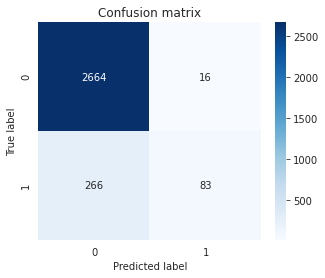

In [ ]:
evaluate_model(cart)

### Rus

Train Accuracy : 0.5965665236051502
Train Confusion Matrix:
[[1526 1154]
 [  68  281]]
--------------------------------------------------
Test Accuracy : 0.5341823056300268
Test Confusion Matrix:
[[689 631]
 [ 64 108]]


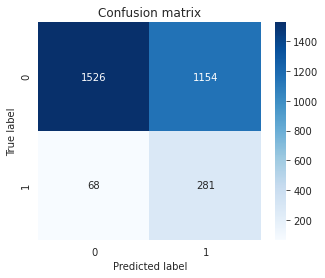

In [ ]:
evaluate_model(rus)

### Forest

Train Accuracy : 0.9088808187520634
Train Confusion Matrix:
[[2674    6]
 [ 270   79]]
--------------------------------------------------
Test Accuracy : 0.8900804289544236
Test Confusion Matrix:
[[1309   11]
 [ 153   19]]


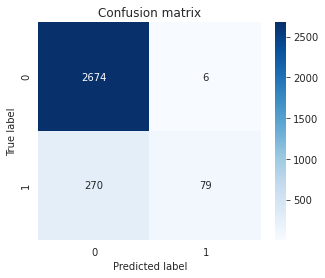

In [ ]:
evaluate_model(forest)

### gboost

Train Accuracy : 1.0
Train Confusion Matrix:
[[2680    0]
 [   0  349]]
--------------------------------------------------
Test Accuracy : 0.8840482573726541
Test Confusion Matrix:
[[1287   33]
 [ 140   32]]


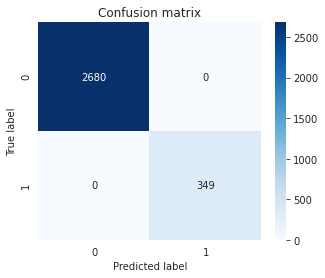

In [ ]:
evaluate_model(gboost)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Train Accuracy : 0.6612743479696269
Train Confusion Matrix:
[[1713  967]
 [  59  290]]
--------------------------------------------------
Test Accuracy : 0.618632707774799
Test Confusion Matrix:
[[817 503]
 [ 66 106]]
Train Accuracy : 0.8332783096731594
Train Confusion Matrix:
[[2275  405]
 [ 100  249]]
--------------------------------------------------
Test Accuracy : 0.7660857908847185
Test Confusion Matrix:
[[1078  242]
 [ 107   65]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Train Accuracy : 0.7127764938923737
Train Confusion Matrix:
[[1828  852]
 [  18  331]]
--------------------------------------------------
Test Accuracy : 0.636058981233244
Test Confusion Matrix:
[[837 483]
 [ 60 112]]
Train Accuracy : 0.8312974579069
Train Confusion Matrix:
[[2199  481]
 [  30  319]]
--------------------------------------------------
Test Accuracy : 0.7305630026809652
Test Confusion Matrix:
[[1010  310]
 [  92   80]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Train Accuracy : 0.7418289864641796
Train Confusion Matrix:
[[1906  774]
 [   8  341]]
--------------------------------------------------
Test Accuracy : 0.6481233243967829
Test Confusion Matrix:
[[860 460]
 [ 65 107]]


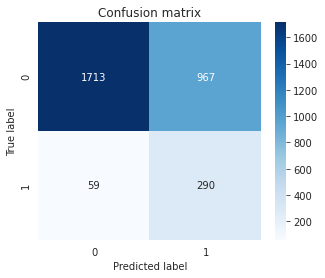

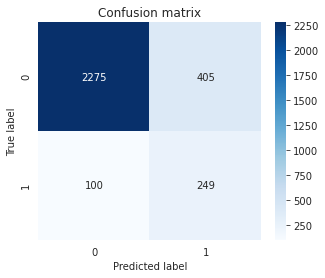

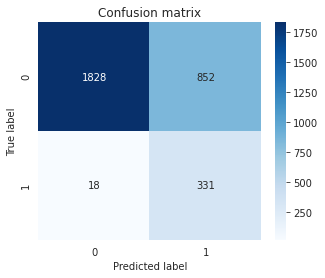

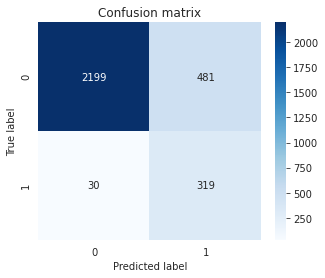

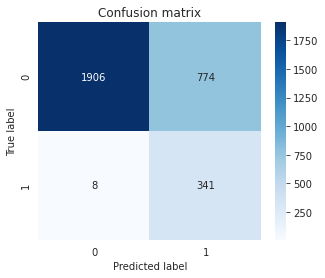

In [ ]:
n_splits = 5

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
ub = BaggingClassifier(warm_start=True, n_estimators=0)

for split in range(n_splits):
    X_res, y_res = RandomUnderSampler(random_state=split).fit_sample(X_train,Y_train) 
    ub.n_estimators += 1
    ub.fit(X_res, y_res)
    evaluate_model(ub)

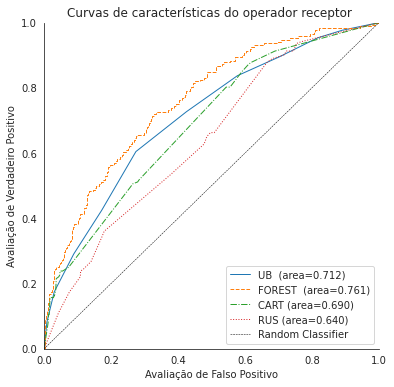

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(6,6))

roc_auc_plot(Y_test,ub.predict_proba(X_test),label='UB ',l='-')
roc_auc_plot(Y_test,forest.predict_proba(X_test),label='FOREST ',l='--')
roc_auc_plot(Y_test,cart.predict_proba(X_test),label='CART', l='-.')
roc_auc_plot(Y_test,rus.predict_proba(X_test),label='RUS',l=':')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        label='Random Classifier')    
ax.legend(loc="lower right")    
ax.set_xlabel('Avaliação de Falso Positivo')
ax.set_ylabel('Avaliação de Verdadeiro Positivo')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Curvas de características do operador receptor ')
sns.despine()

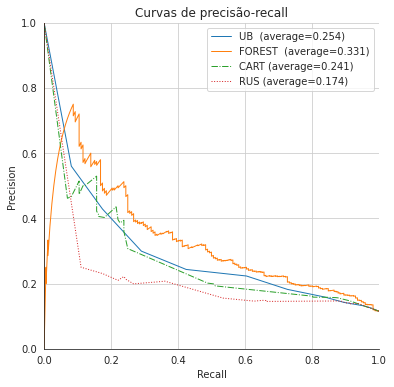

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(Y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(Y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(6,6))
precision_recall_plot(Y_test,ub.predict_proba(X_test),label='UB ',l='-')
precision_recall_plot(Y_test,forest.predict_proba(X_test),label='FOREST ',l='-')
precision_recall_plot(Y_test,cart.predict_proba(X_test),label='CART',l='-.')
precision_recall_plot(Y_test,rus.predict_proba(X_test),label='RUS',l=':')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="upper right")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Curvas de precisão-recall')
sns.despine()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from pandas import Series


In [ ]:
train = df

In [ ]:
df.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [ ]:
df.head(5)

#there are some null values so I dropped them


,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,2,1,0,0.999024,0,0,1,19,10,0.044165,1,-0.001148,0.0,0,0
1,6,2,2,0,0.998946,1,1,1,11,5,0.045890,1,0.389208,4.0,1,0
2,9,1,3,0,0.990741,1,0,1,16,4,0.135768,1,0.378875,1.0,1,0
3,9,2,3,0,0.991033,1,1,0,3,6,0.133615,4,-0.001148,0.0,0,0
4,8,2,2,0,0.000000,1,0,0,5,5,1.000000,1,-0.001148,0.0,0,0


In [ ]:
df.isnull().sum().sum()


0

In [ ]:
train = df.dropna()
train.isnull().sum().sum()

train

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,2,1,0,0.999024,0,0,1,19,10,0.044165,1,-0.001148,0.0,0,0
1,6,2,2,0,0.998946,1,1,1,11,5,0.045890,1,0.389208,4.0,1,0
2,9,1,3,0,0.990741,1,0,1,16,4,0.135768,1,0.378875,1.0,1,0
3,9,2,3,0,0.991033,1,1,0,3,6,0.133615,4,-0.001148,0.0,0,0
4,8,2,2,0,0.000000,1,0,0,5,5,1.000000,1,-0.001148,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,6,2,2,0,-0.711366,1,0,1,30,7,0.702821,5,-0.001148,0.0,0,0
4517,5,2,3,1,-0.998935,1,1,0,9,5,0.046133,1,-0.001148,0.0,0,0
4518,7,2,2,0,0.890163,0,0,1,19,8,0.455643,11,-0.001148,0.0,0,0
4519,8,2,2,0,0.993625,0,0,1,6,2,0.112733,4,0.242250,3.0,3,0


In [ ]:
#train = train.drop(['lead_time'], axis = 1)
#train['lead_time'] = train['lead_time'].fillna(train['lead_time'].mean())
#train=train.drop(['sku'], axis=1)
#train.replace(['Yes', 'No'], [1, 0])

#train['went_on_backorder']=train['went_on_backorder'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['potential_issue']=train['potential_issue'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['deck_risk']=train['deck_risk'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['oe_constraint']=train['oe_constraint'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['ppap_risk']=train['ppap_risk'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['stop_auto_buy']=train['stop_auto_buy'].map( {'No': 0, 'Yes': 1} ).astype(int)
#train['rev_stop']=train['rev_stop'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

a=[column for column in train]
trace = go.Heatmap(z=train.corr().values,
                   x=a,
                   y=a)
data=[trace]
py.iplot(data, filename='backorders heatmap')

In [ ]:
X = train.drop(['y'], axis = 1)
Y = train['y']

Text(0.5, 1.0, 'Went on backorder? (0=No, 1=Yes)')

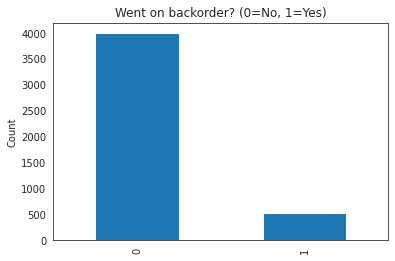

In [ ]:
plt.figure()
train['y'].value_counts().plot(kind = 'bar')
plt.ylabel("Count")
plt.title('Went on backorder? (0=No, 1=Yes)')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=y, random_state = 0)



In [ ]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 0)
X_train, Y_train = oversampler.fit_sample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Text(0.5, 1.0, 'Went on backorder? (0=No, 1=Yes)')

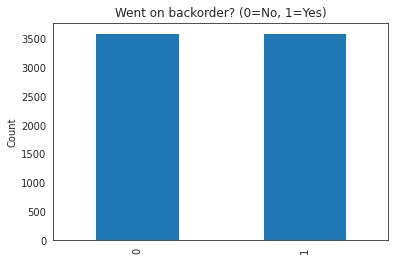

In [ ]:
plt.figure()
Series(Y_train).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.title('Went on backorder? (0=No, 1=Yes)')

In [ ]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

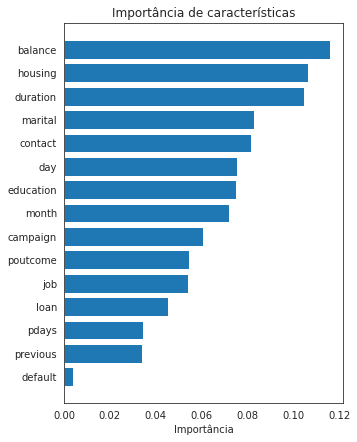

In [ ]:
features_list = train.columns.values
feature_importance = RF.feature_importances_
sorted_idx = np.argsort(feature_importance)[:20]
 
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importância')
plt.title('Importância de características')
plt.draw()
plt.show()

In [ ]:
train['balance'].describe()

count    4521.000000
mean        0.622749
std         0.514048
min        -0.999966
25%         0.304460
50%         0.916323
75%         0.993898
max         1.000000
Name: balance, dtype: float64

In [ ]:
Y_pred = RF.predict(X_test)

In [ ]:
print("Random Forest Classifier report \n", classification_report(Y_test, Y_pred))

Random Forest Classifier report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       401
           1       0.42      0.15      0.23        52

    accuracy                           0.88       453
   macro avg       0.66      0.56      0.58       453
weighted avg       0.84      0.88      0.85       453



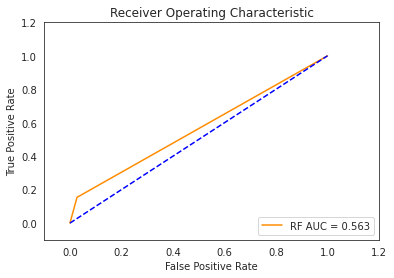

In [ ]:
roc_curve_acc(Y_test, Y_pred, "RF")

Text(0.5, 15.0, 'Predicted label')

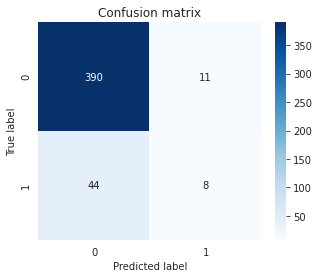

In [ ]:
plt.figure(figsize = (5,4))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

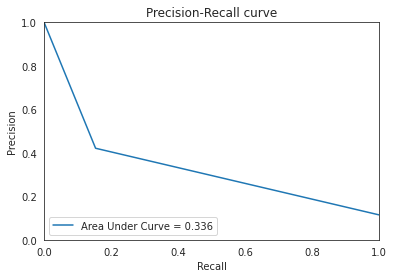

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.show()

In [ ]:
Y_pred = RF.predict(X_test)

In [ ]:
print("Test data Random Forest Classifier report \n", classification_report(Y_test, Y_pred))


Test data Random Forest Classifier report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       401
           1       0.42      0.15      0.23        52

    accuracy                           0.88       453
   macro avg       0.66      0.56      0.58       453
weighted avg       0.84      0.88      0.85       453



# Deep Learning

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


In [ ]:
X = df.drop('y', axis=1)
y = np.ravel(df.iloc[: , -1:])
print('Imbalanced ratio in training set: 1:%i' % (Counter(y)[0]/Counter(y)[1]))

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

# Divisão do conjunto de dados  teste (1/3); treino (2/3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


X.corr()



Imbalanced ratio in training set: 1:7


,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
job,1.000000,0.004932,0.161522,-0.020684,0.000280,0.151590,0.024478,-0.037959,0.016521,0.004057,-0.026705,0.022216,0.035342,0.005140,0.015903
marital,0.004932,1.000000,-0.109124,0.020745,-0.036704,0.029851,0.045210,-0.037977,-0.008794,0.004535,0.024096,-0.005915,-0.017050,-0.038028,-0.031079
education,0.161522,-0.109124,1.000000,-0.008835,0.028070,-0.031251,0.016102,0.078797,0.013508,0.005581,-0.035795,0.019268,0.006886,0.027320,0.026825
default,-0.020684,0.020745,-0.008835,1.000000,-0.226086,0.006881,0.063994,-0.021082,-0.013261,-0.002624,0.082149,-0.012348,-0.026317,-0.026656,-0.022538
balance,0.000280,-0.036704,0.028070,-0.226086,1.000000,-0.048567,-0.096953,0.057107,-0.029977,-0.074235,-0.643734,-0.008249,0.048938,0.046554,0.062415
housing,0.151590,0.029851,-0.031251,0.006881,-0.048567,1.000000,0.018451,-0.210574,-0.031291,-0.173275,-0.027458,-0.003574,0.116893,0.038621,0.039403
loan,0.024478,0.045210,0.016102,0.063994,-0.096953,0.018451,1.000000,0.002610,-0.004879,0.008960,0.058339,0.017120,-0.031086,-0.022115,-0.043741
contact,-0.037959,-0.037977,0.078797,-0.021082,0.057107,-0.210574,0.002610,1.000000,0.063496,-0.053679,-0.014777,0.007929,0.210690,0.173410,0.223913
day,0.016521,-0.008794,0.013508,-0.013261,-0.029977,-0.031291,-0.004879,0.063496,1.000000,-0.042513,-0.001800,0.160706,-0.094352,-0.059114,-0.057992
month,0.004057,0.004535,0.005581,-0.002624,-0.074235,-0.173275,0.008960,-0.053679,-0.042513,1.000000,0.087475,0.162203,-0.124317,-0.105894,-0.143289


In [ ]:

import csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout


model = Sequential()
model.add(Dense(100, activation='relu', input_dim=15))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='relu'))
model.compile( optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])   
  
history = model.fit(X_train,Y_train,verbose=1,shuffle=True,batch_size=100,validation_split=0.2, epochs=1)
print("Model training finished")



25/25 [==============================] - 1s 10ms/step - loss: 0.7329 - accuracy: 0.8849 - val_loss: 0.6931 - val_accuracy: 0.8845
Model training finished
